# MFFC's

¿Para que sirve MFCC's? Sirve para reconocer audio con un tipo de acento de voz y clasificador por timbres (generos) de musica.

Output: Spectral (vectores sobre los 25 ms ) estos numerios capturan la informacion de este dominio. 

Entonces para un audio el mfcc's seria una matriz : ([numero de ventanas (tiempo corto)] x [numero de coeficientes])

PASOS DE MFCC'S

1. Inicialmente recibe el audio como tal (onda -tiempo-) y lo que hace luego es transformarlo a dominio de frecuencias, y a partir de alli pasa al dominio Mel (escala mel y simula la percepcion de la intensida), luego log (normalizacion) y DCT (Transformada de cos en dominimo cepstral) (MFCC's coeficientes: numeros spectral)

Aplicamos kmean y los centroides -> vendrian a ser parte del codebook ->  usar metodo del codo  para hallar el mejor k

Aplicar -> gmm o kmedoids





In [1]:
import librosa
import numpy as np
import os



def extract_mfcc(file_path, n_mfcc=13):# Los coeficientes por frame	13 (timbre,armonía, tono,etc.)
    """"
        # n_mfcc (1-10) : muy compacto pierde detalle
        # n_mfcc (13) : balance entre detalle y compacidad
        # n_mfcc (20-40) : muy detallado, pero puede ser ruidoso mas dimensiones
        Extrae las características MFCC de un archivo de audio.
    """
    y, sr = librosa.load(file_path , duration=30)  # y: waveform, sr: sample rate    solo los 30s

    print("y:",y)
    print("sr:",sr)
    #show onda sin procesar
    mostrar_onda(y,sr)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc ,hop_length=int(sr*0.5), n_fft=int(sr*0.5) )#trabajamos con 0.5s

    return mfcc.T  # transponer para que cada fila sea un frame


import matplotlib.pyplot as plt
import librosa.display

def show_mfcc(mfcc_features,title="Coeficiente MFCC 1 a lo largo del tiempo"):
    # Supón que ya tienes `mfcc` con shape (1292, 13)
    plt.plot(mfcc_features[:, 0])  # Graficar solo el coeficiente 1
    plt.title(title)
    plt.xlabel("Frames (1s por frame)")
    plt.ylabel("Valor del coeficiente")
    plt.show()


def mostrar_onda(y, sr):
    librosa.display.waveshow(y, sr=sr)
    plt.title("Forma de onda - Audio de entrada (sin procesar)")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Amplitud")
    plt.tight_layout()
    plt.show()


ModuleNotFoundError: No module named 'librosa'

y: [ 1.9526136e-14  9.9760830e-15 -2.7103164e-14 ... -4.1630417e-01
 -3.7790507e-01 -2.8340709e-01]
sr: 22050


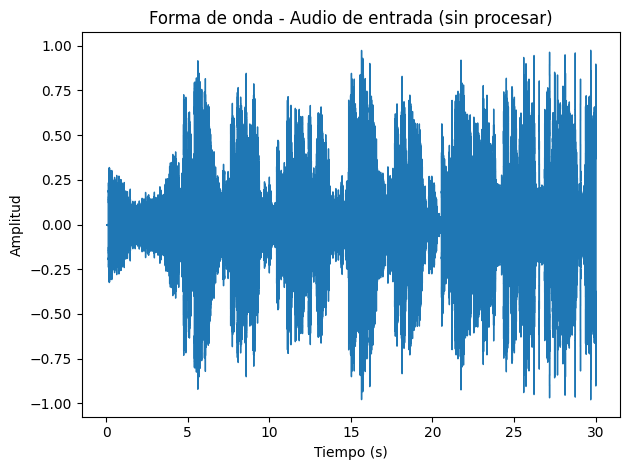

mfcc_feature: [[-1.17139053e+01  9.61442642e+01 -1.68328857e+01  4.54506779e+00
  -1.10177517e+01  5.97414589e+00 -6.18079901e+00  6.24987507e+00
  -5.38969040e+00  3.28124332e+00 -8.85890579e+00 -3.92895174e+00
  -5.22764301e+00]
 [ 1.09492393e+02  9.23692017e+01 -1.19730253e+01  5.07324314e+00
  -1.06779089e+01  4.88427639e+00 -6.86344337e+00 -4.03249741e-01
  -6.18695116e+00  2.43996716e+00 -5.40671444e+00  1.23782068e-01
  -6.38613129e+00]
 [ 9.84455338e+01  8.59348145e+01 -1.02657738e+01  8.33907008e-01
  -5.65466881e+00  4.39423084e+00 -7.61927700e+00  1.88111687e+00
  -9.20893097e+00  2.55509758e+00 -7.61478758e+00  3.26433361e-01
  -4.68321562e+00]
 [ 3.47231827e+01  9.45819855e+01 -5.82733631e+00  9.89436531e+00
  -2.72216487e+00  3.32010365e+00 -8.97970772e+00  1.61765218e+00
  -6.81781673e+00  2.08215141e+00 -3.85304809e+00  1.31137192e+00
  -6.07842779e+00]
 [ 1.89175854e+01  1.02284729e+02 -3.51190329e+00  4.11577845e+00
  -2.30025554e+00  9.00659466e+00 -8.09464169e+00  6

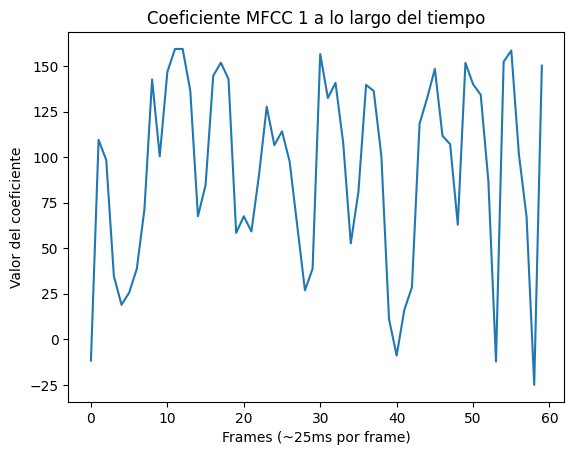

In [9]:
# Beat tracking example
import librosa

# 1. Get the file path to an included audio example
#filename = librosa.example('nutcracker')
filename = "./audio/harristyle.mpeg"  # Cambia a la ruta de tu archivo
mfcc_features = extract_mfcc(filename, n_mfcc=13)

print("mfcc_feature:", mfcc_features)  # muestra las características MFCC

print(f"MFCC features shape: {mfcc_features.shape}") #shape: es el número de frames x número de coeficientes MFCC


show_mfcc(mfcc_features)


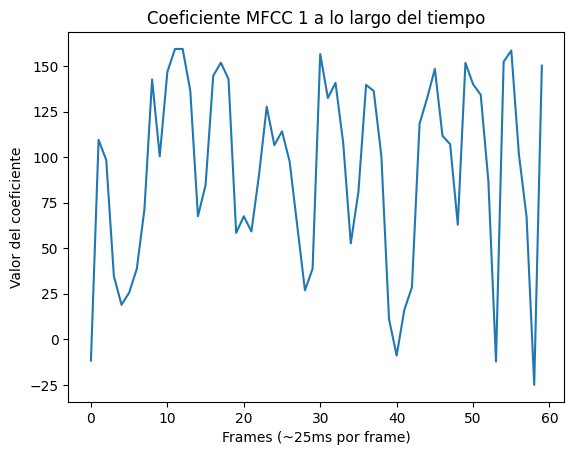

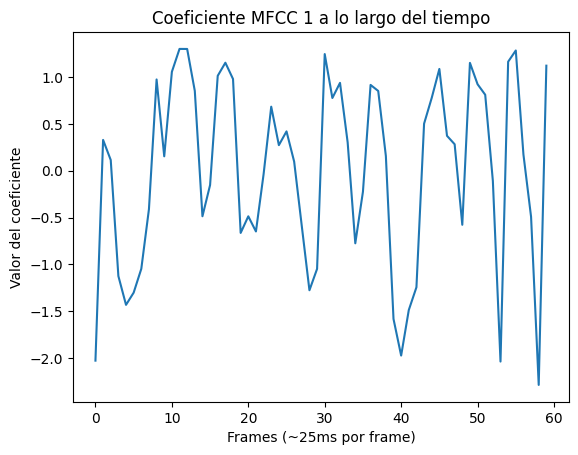

In [ ]:
#NORMALIZAR LA DATA PARA EL Kmeans 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
mfcc_normalizado=scaler.fit_transform(mfcc_features)
show_mfcc(mfcc_features)
show_mfcc(mfcc_normalizado,title="Coeficiente MFCC 1 a lo largo del tiempo Normalizado")

#print(mfcc_features)

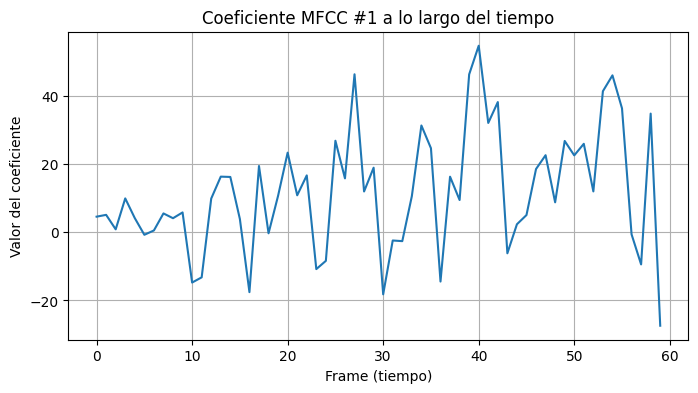

In [15]:
plt.figure(figsize=(8, 4))
plt.plot(mfcc_features[:, 3])
plt.title(f"Coeficiente MFCC #{0+1} a lo largo del tiempo")
plt.xlabel("Frame (tiempo)")
plt.ylabel("Valor del coeficiente")
plt.grid(True)
plt.show()

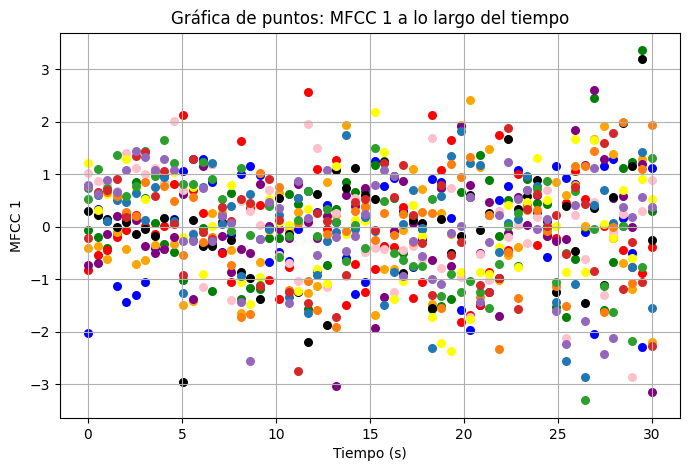

In [49]:
# mfcc_feature.shape == (60, 13)

import matplotlib.pyplot as plt
import numpy as np

# Supón que mfcc_features.shape == (60, 13)
# Queremos graficar MFCC 1 a lo largo del tiempo

mfcc_1 = mfcc_normalizado[:, 0]  # MFCC 1 (una dimensión)
mfcc_2=mfcc_normalizado[:, 1]
mfcc_3=mfcc_normalizado[:, 2]
mfcc_4=mfcc_normalizado[:, 3]
mfcc_5=mfcc_normalizado[:, 4]
mfcc_6=mfcc_normalizado[:, 5]
mfcc_7=mfcc_normalizado[:, 6]
mfcc_8=mfcc_normalizado[:, 7]
mfcc_9=mfcc_normalizado[:, 8]
mfcc_10=mfcc_normalizado[:, 9]
mfcc_11=mfcc_normalizado[:, 10]
mfcc_12=mfcc_normalizado[:, 11]
mfcc_13=mfcc_normalizado[:, 12]
n_frames = mfcc_1.shape[0]

# Eje X: tiempo (por ejemplo, 60 frames en pasos de 0.5 segundos)
# Puedes adaptar el paso si tienes la duración exacta
tiempo = np.linspace(0, n_frames * 0.5, n_frames)  # aquí 0.5 es un ejemplo

# Graficar
plt.figure(figsize=(8, 5))
plt.scatter(tiempo, mfcc_1, color='blue', s=30)
plt.scatter(tiempo, mfcc_2, color='green', s=30)
plt.scatter(tiempo, mfcc_3, color='red', s=30)
plt.scatter(tiempo, mfcc_4, color='orange', s=30)
plt.scatter(tiempo, mfcc_5, color='purple', s=30)
plt.scatter(tiempo, mfcc_6, color='pink', s=30)
plt.scatter(tiempo, mfcc_7, color='black', s=30)
plt.scatter(tiempo, mfcc_8, color='yellow', s=30)
plt.scatter(tiempo, mfcc_9,  s=30)
plt.scatter(tiempo, mfcc_10, s=30)
plt.scatter(tiempo, mfcc_11,s=30)
plt.scatter(tiempo, mfcc_12,  s=30)
plt.scatter(tiempo, mfcc_13, s=30)

plt.title('Gráfica de puntos: MFCC 1 a lo largo del tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('MFCC 1')
plt.grid(True)
plt.show()


In [41]:
#APLICAR KMEANS 
from sklearn.cluster import KMeans
 
# --- PARÁMETROS ---
K = 8  # Usemos un tamaño de Codebook pequeño para este ejemplo
# --- PASO 1: ENTRENAR EL CODEBOOK CON K-MEANS ---
print(f"\nEntrenando K-Means con K={K} para crear un 'mini-codebook'...")
kmeans = KMeans(n_clusters=K, random_state=42, n_init='auto')
kmeans.fit(mfcc_normalizado)

# El codebook son los centroides de los clusters
codebook = kmeans.cluster_centers_
print(f"Mini-Codebook creado. Forma: {codebook.shape}") # Debería ser (8, 13)
print(f"Centroides: {codebook}") 

# --- PASO 2: CUANTIZAR LOS FRAMES ---
# Asignamos cada uno de los 60 frames a su "palabra acústica" (cluster) más cercana.
print("\nCuantizando los 60 frames...")
word_assignments = kmeans.predict(mfcc_normalizado)

print(f"Secuencia de 'palabras acústicas' para la canción (primeros 20):")
print(word_assignments[:20]) # Muestra a qué cluster pertenece cada uno de los primeros 20 frames
print(f"Longitud de la secuencia: {len(word_assignments)}") # Debería ser 60




Entrenando K-Means con K=8 para crear un 'mini-codebook'...
Mini-Codebook creado. Forma: (8, 13)
Centroides: [[ 0.6503693  -0.6005941   0.6353032  -0.02947631  0.4671027  -0.41849014
  -0.83705676 -1.2149057   0.3800571   0.08471474 -0.00744202 -0.9973843
   0.47963777]
 [ 0.56484306  0.33646327  0.0409906   0.02076867  0.41993636  0.16837245
   0.8063936   0.8967203   0.28076854  0.6806334   0.63208675  0.5797485
   0.6609069 ]
 [ 0.46253154  0.9714718  -0.67829764 -0.9868648  -0.8446955  -1.2711014
   0.7245609   0.4869423  -0.5627332  -0.39172208 -0.15417925  0.3056432
   0.62474585]
 [-0.37522876  0.03461138 -0.04476133 -0.4153553  -0.5801915   0.8540104
   0.16930956  0.6690933   0.20308366  0.40319443  0.80356455  0.2632587
   0.54300576]
 [ 0.8394667  -1.0903962   0.29550427  0.67262566  0.4521976  -0.78173035
  -0.5691813  -0.8242316  -0.6009711  -0.76056576 -1.214751    0.74334306
  -1.8461238 ]
 [-1.0058917   0.5588761  -1.3140771   1.1744322   0.3613777  -0.782515
   0.2610

In [ ]:
#APLICAR DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
#encontrar patrones 
#
from sklearn.cluster import DBSCAN
dbscan=DBSCAN